In [261]:
import numpy as np
import matplotlib.pyplot as plt

In [262]:
# define constants
gamma = 5/3        # adiabatic constant for ideal monatomic gas
mu = 1.22           # mean molecular weight including a helium mass fraction 0.24
k_B = 1.380649E-23  # boltzmann constant in m^2 kg s^-2 K^-1
m_H = 1.66E-27      # mass of hydrogen atom in kg
Lambda = 0.05       # eaccretion eigenvalue

In [263]:
# set the figure size
plt.rcParams['figure.figsize'] = [5, 5]
# plt.rcParams['figure.dpi'] = 300

In [264]:
# Read thermal history data
redshift_digitizer, temperature_digitizer = np.loadtxt('./thermal_history.csv', delimiter=', ', unpack=True)
# define the data point of plot
redshift_in = np.linspace(1, 1001, 1001)
redshift = np.linspace(1, 1000, 1000)
temperature = np.interp(redshift, redshift_digitizer, temperature_digitizer)

<Figure size 1500x1500 with 0 Axes>

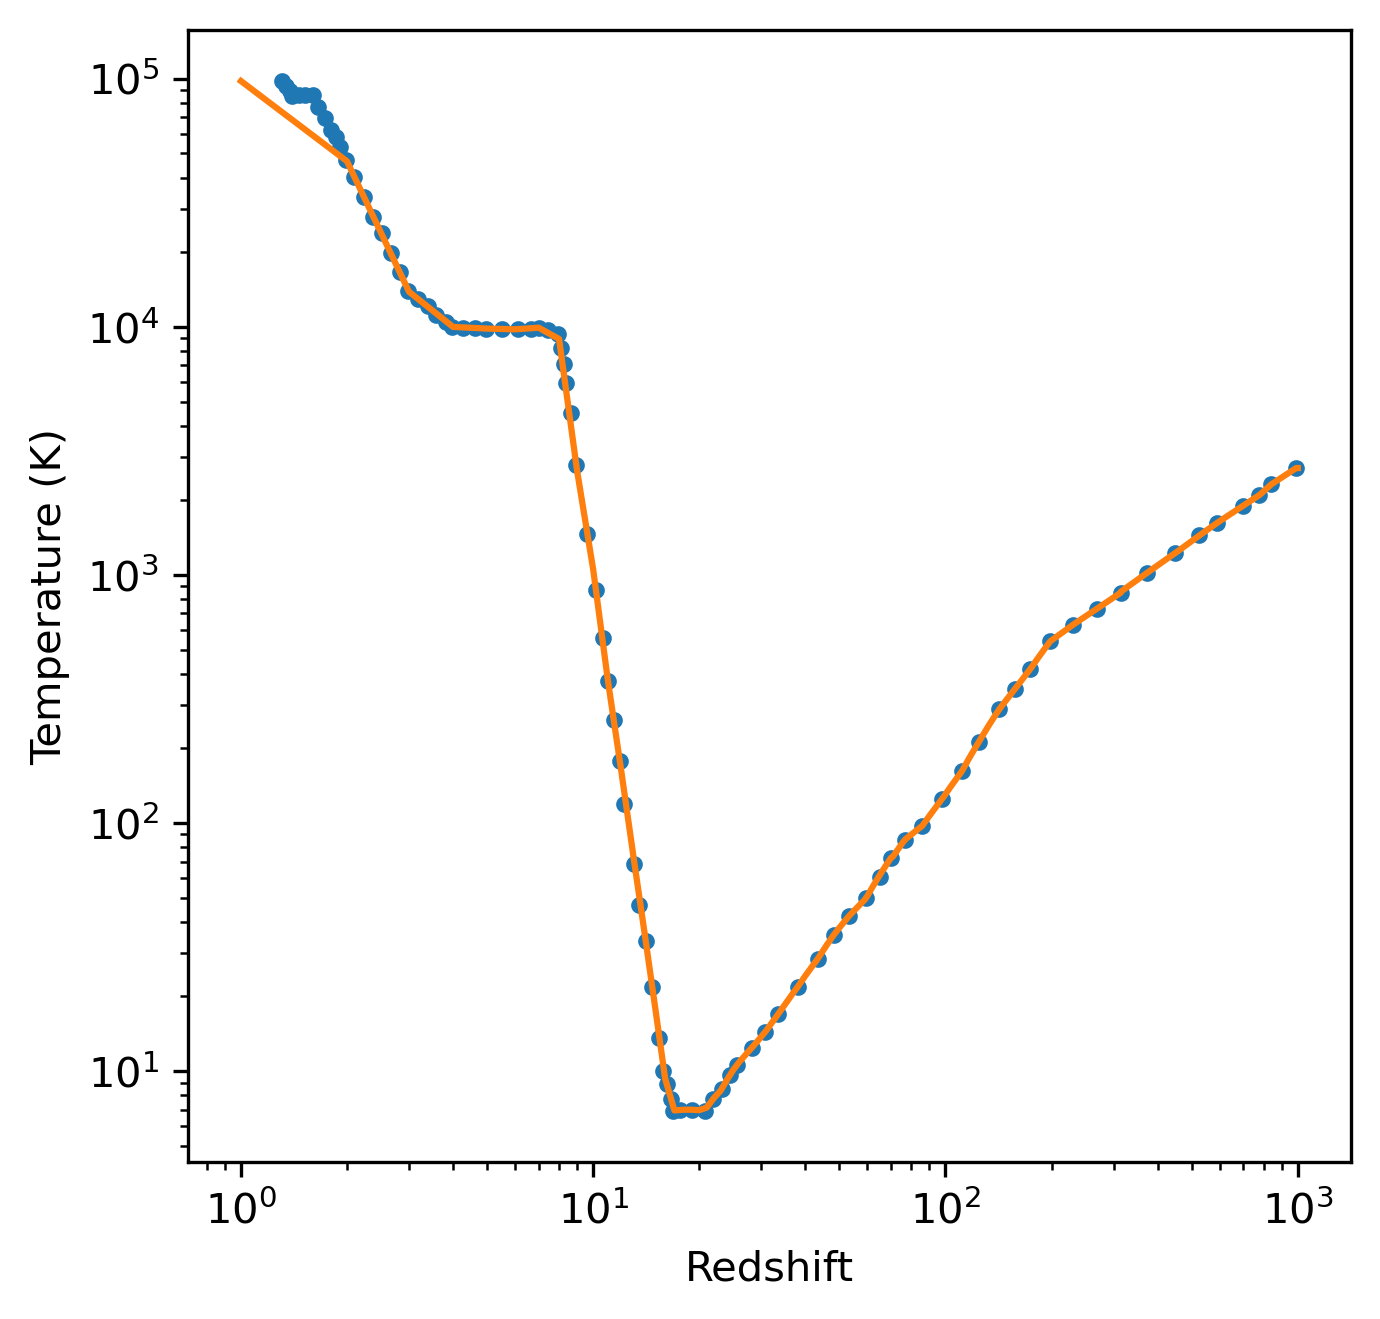

In [265]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_xscale('log')
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Temperature (K)')
# thermal history data points from digitizer
axes.plot(redshift_digitizer, temperature_digitizer, '.')
axes.plot(redshift, temperature)

<Figure size 1500x1500 with 0 Axes>

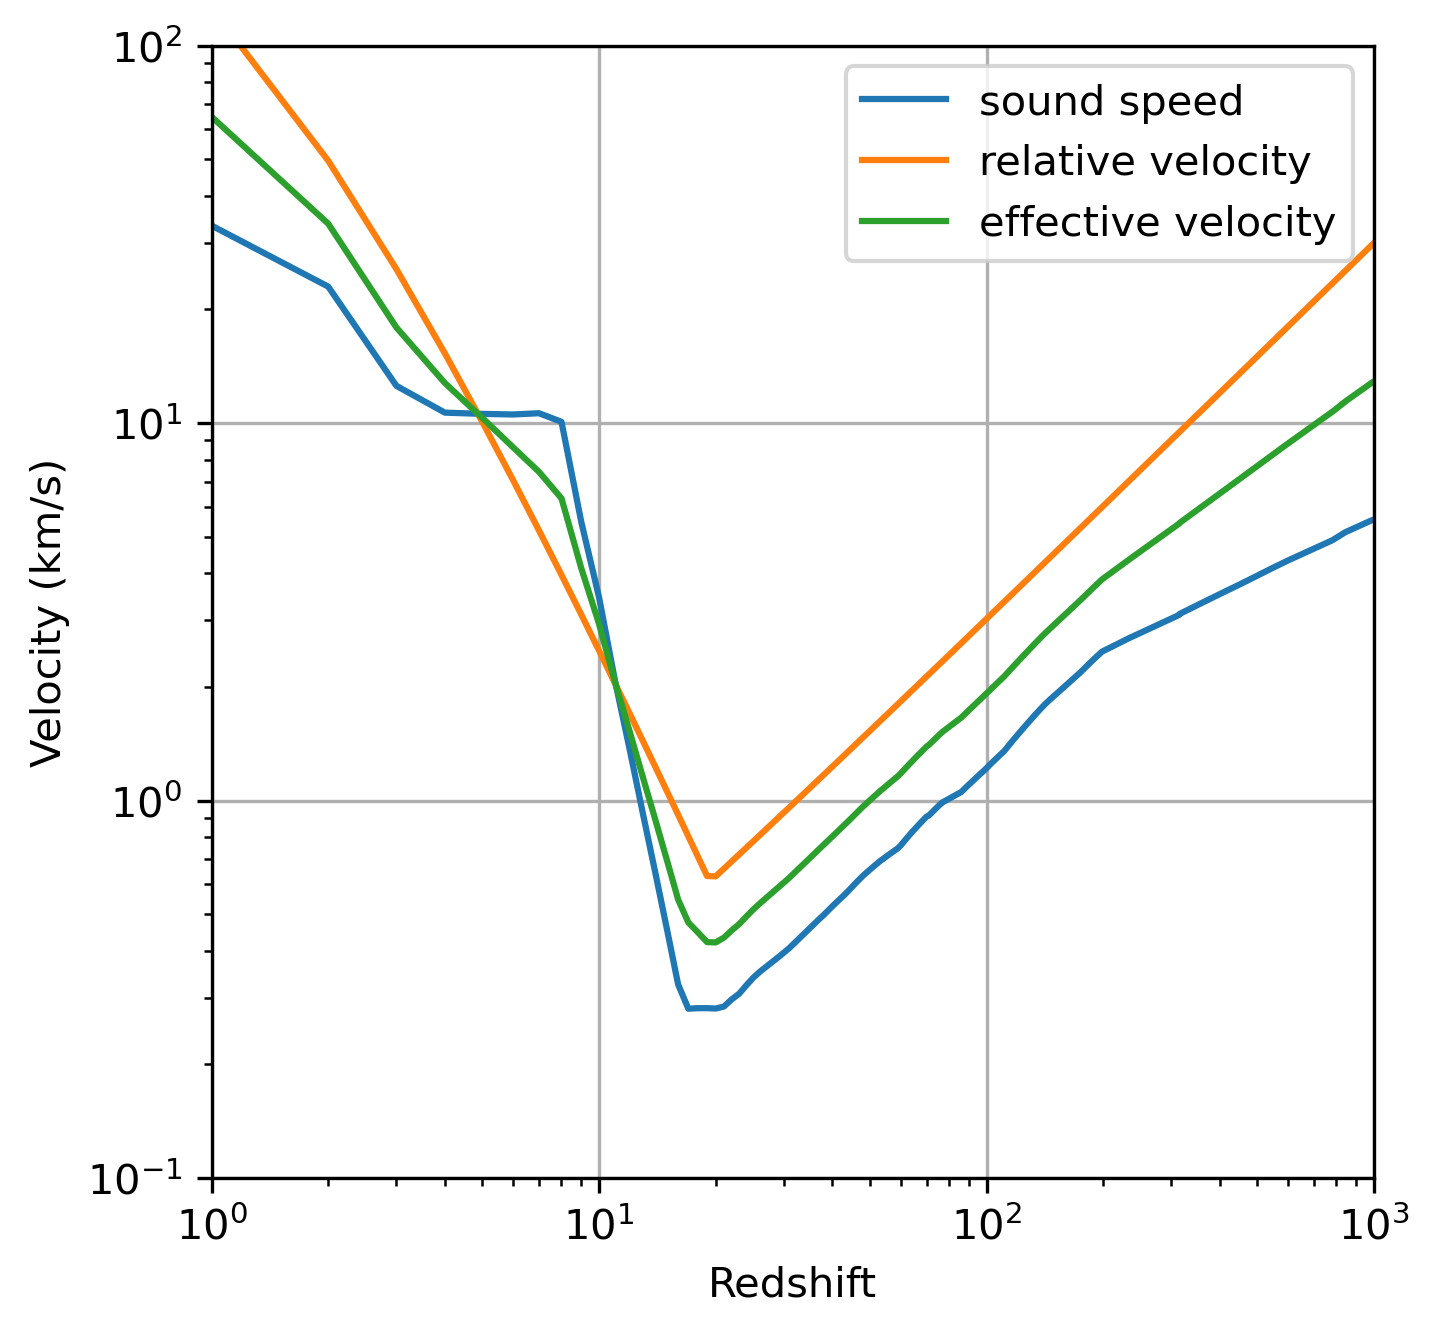

In [266]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_yscale('log')
axes.set_ylim([0.1, 100])
axes.set_xscale('log')
axes.set_xlim([1, 1000])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Velocity (km/s)')

# calculation of variables
# sound speed in km/s
# relative speed in km/s
# effective velocity in km/s
sound_speed = np.sqrt(gamma*k_B*temperature/mu/m_H) / 1000
relative_speed = np.piecewise(redshift, [redshift >= 19.3, redshift < 19.3], [lambda z: 30/1000*(1+z), lambda z: 620*(1+z)**-2.3])
effective_velocity = np.sqrt(sound_speed*relative_speed)

# effective velocity plot
axes.plot(redshift, sound_speed, label='sound speed')
axes.plot(redshift, relative_speed, label='relative velocity')
axes.plot(redshift, effective_velocity, label='effective velocity')

axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

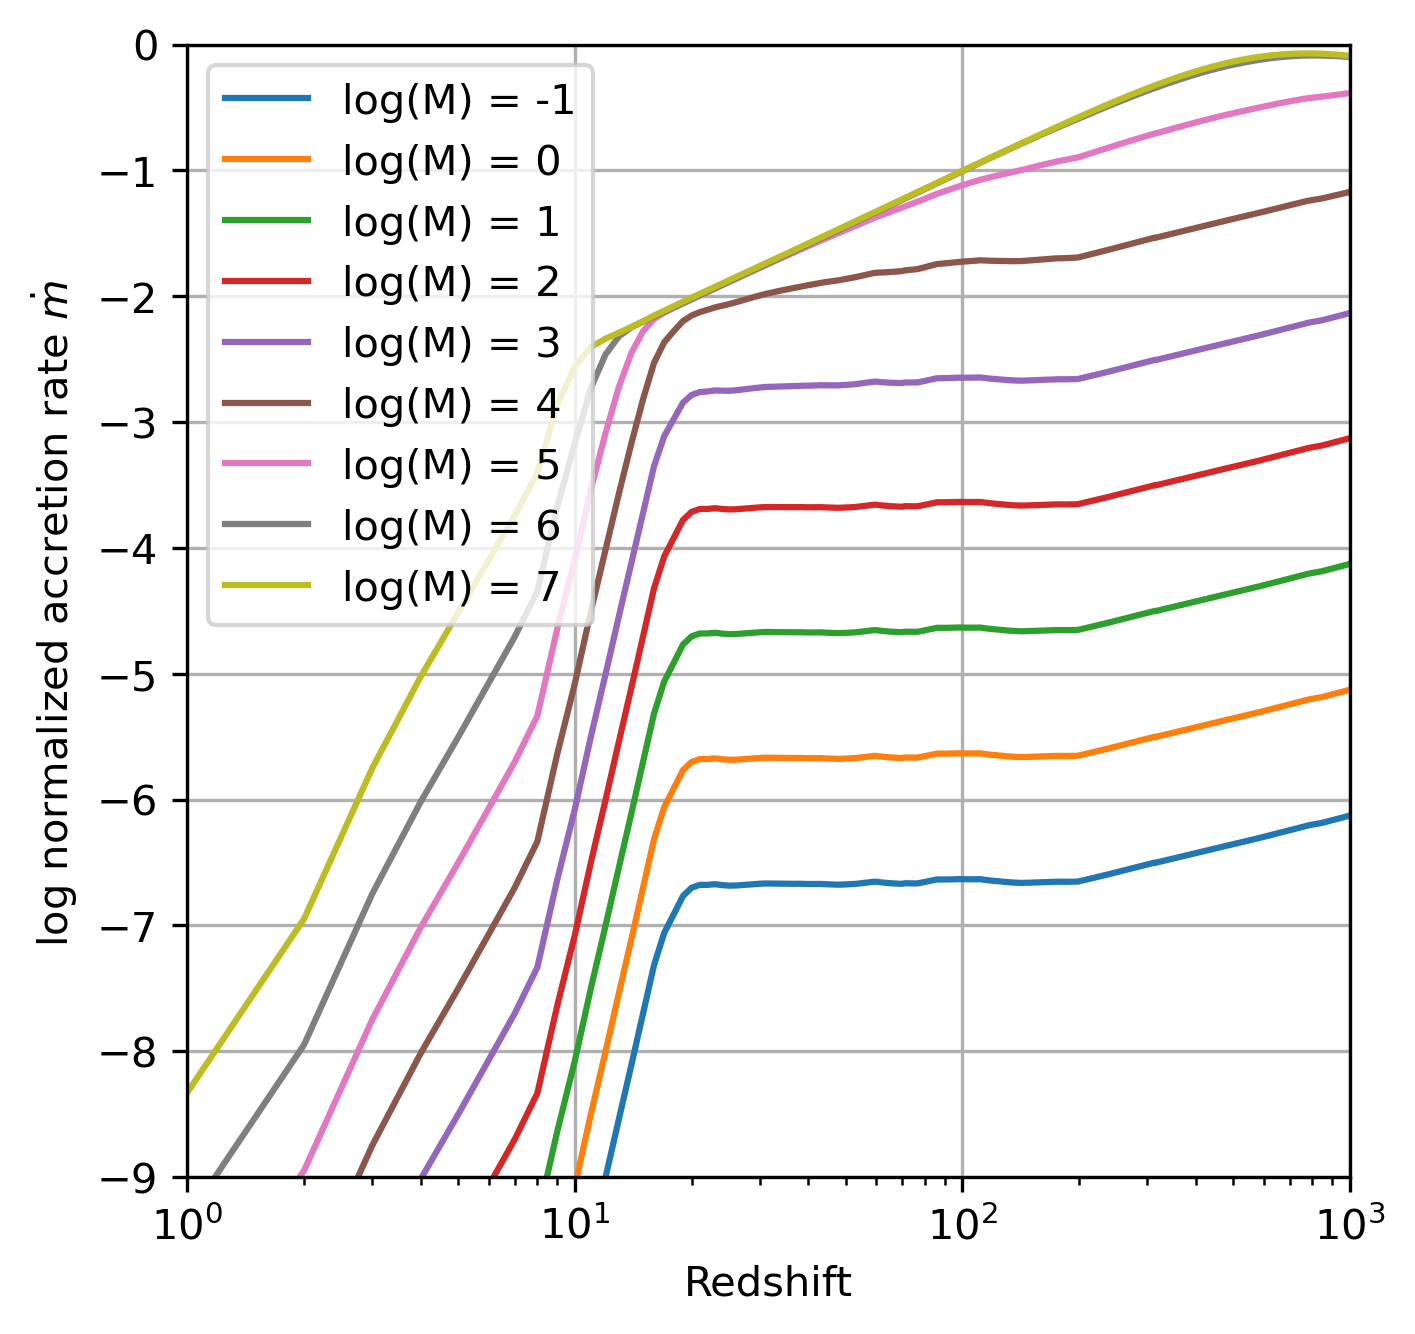

In [267]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log normalized accretion rate $\dot{m}$ ')

# variables for calculating accretion eigenvalue
def Bondi_radius(M):    # in cm
    return 1.34E16*(M)*np.power(effective_velocity, -2)
def beta(M):
    t_cr = Bondi_radius(M)/100/1000/effective_velocity  #in s
    x_e = 5E-3
    Hubble_rate = 3.24E-18*np.sqrt(0.127)*np.power(1+redshift, 3/2) #in s^-1
    effective_viscosity = Hubble_rate   *(1+1.78*x_e*np.power((1+redshift)/100, 5/2))
    return effective_viscosity*t_cr

# accretion eigenvalue in eq. 9 for small viscosity
def lambda_0(M):
    gamma = 1.66
    xi = 0.75*np.power((gamma+1)/(5-3*gamma), (gamma-1)/(gamma+1))
    def cs_cr(beta):
        cs_cr_0 = np.sqrt(2/(5-3*gamma))
        return (3*cs_cr_0+beta**xi)/(3+beta**xi)
    x_cr = np.power(cs_cr(beta(M)), -2)*(-1+np.sqrt(1+beta(M)*np.power(cs_cr(beta(M)), -3)))/(beta(M)*cs_cr(beta(M))**-3)
    return np.exp(9/2/(3+np.power(beta(M), 0.75)))*x_cr**2
# accretion eigenvalue form eq. 8 and 10 (more accurate)
def lambda_1(M):
    gamma = 1.1 # isothermal
    xi = 0.75*np.power((gamma+1)/(5-3*gamma), (gamma-1)/(gamma+1))
    def cs_cr(beta):
        cs_cr_0 = np.sqrt(2/(5-3*gamma))
        return (3*cs_cr_0+beta**xi)/(3+beta**xi)
    x_cr = np.power(cs_cr(beta(M)), -2)*(-1+np.sqrt(1+beta(M)*np.power(cs_cr(beta(M)), -3)))/(beta(M)*cs_cr(beta(M))**-3)

    scale = 1/4*cs_cr(0)**((gamma+1)/(gamma-1)-4)
    return np.power(cs_cr(beta(M)), (gamma+1)/(gamma-1))*x_cr**2/scale*0.05

# calculation of accretion rate
def accretion_rate(M):
    return lambda_1(M)*0.321*(((1+redshift)/1000)**3)*(M)*effective_velocity**-3
# accretion rate plot
for i in range(-1, 8):
    axes.plot(redshift, np.log10(accretion_rate(10**i)), label=f'log(M) = {i}')
axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

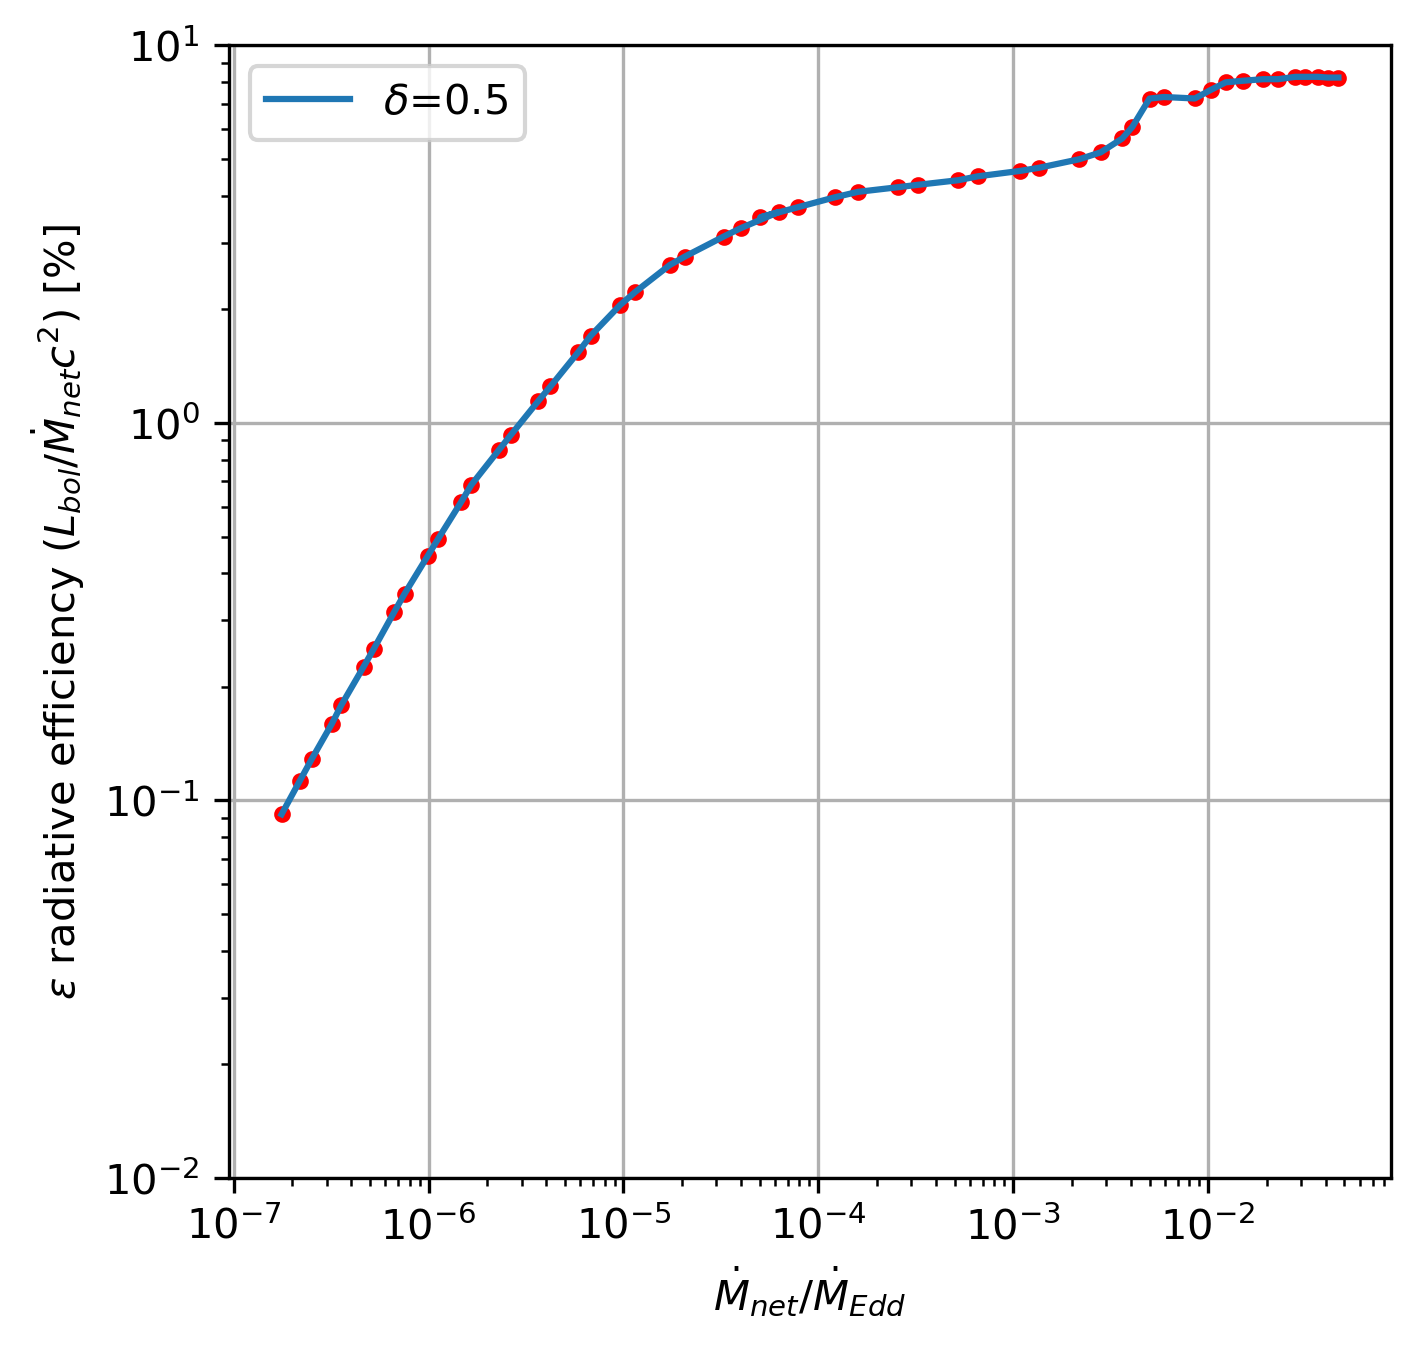

In [268]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
# axes.set_xlim([10**-6, 10**-1])
axes.set_yscale('log')
axes.set_ylim([0.01, 10])
axes.set_xlabel(r'$\dot{M}_{net}/\dot{M}_{Edd}$')
axes.set_ylabel(r'$\epsilon$ radiative efficiency $(L_{bol}/\dot{M}_{net}c^{2})$ [%]')

accretion_rate_digitizer, radiative_efficiency_digitizer = np.loadtxt(f'./radiative_efficiency_map_56.csv', delimiter=', ', unpack=True)
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, 'r.')
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, label=r'$\delta$=0.5')

axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

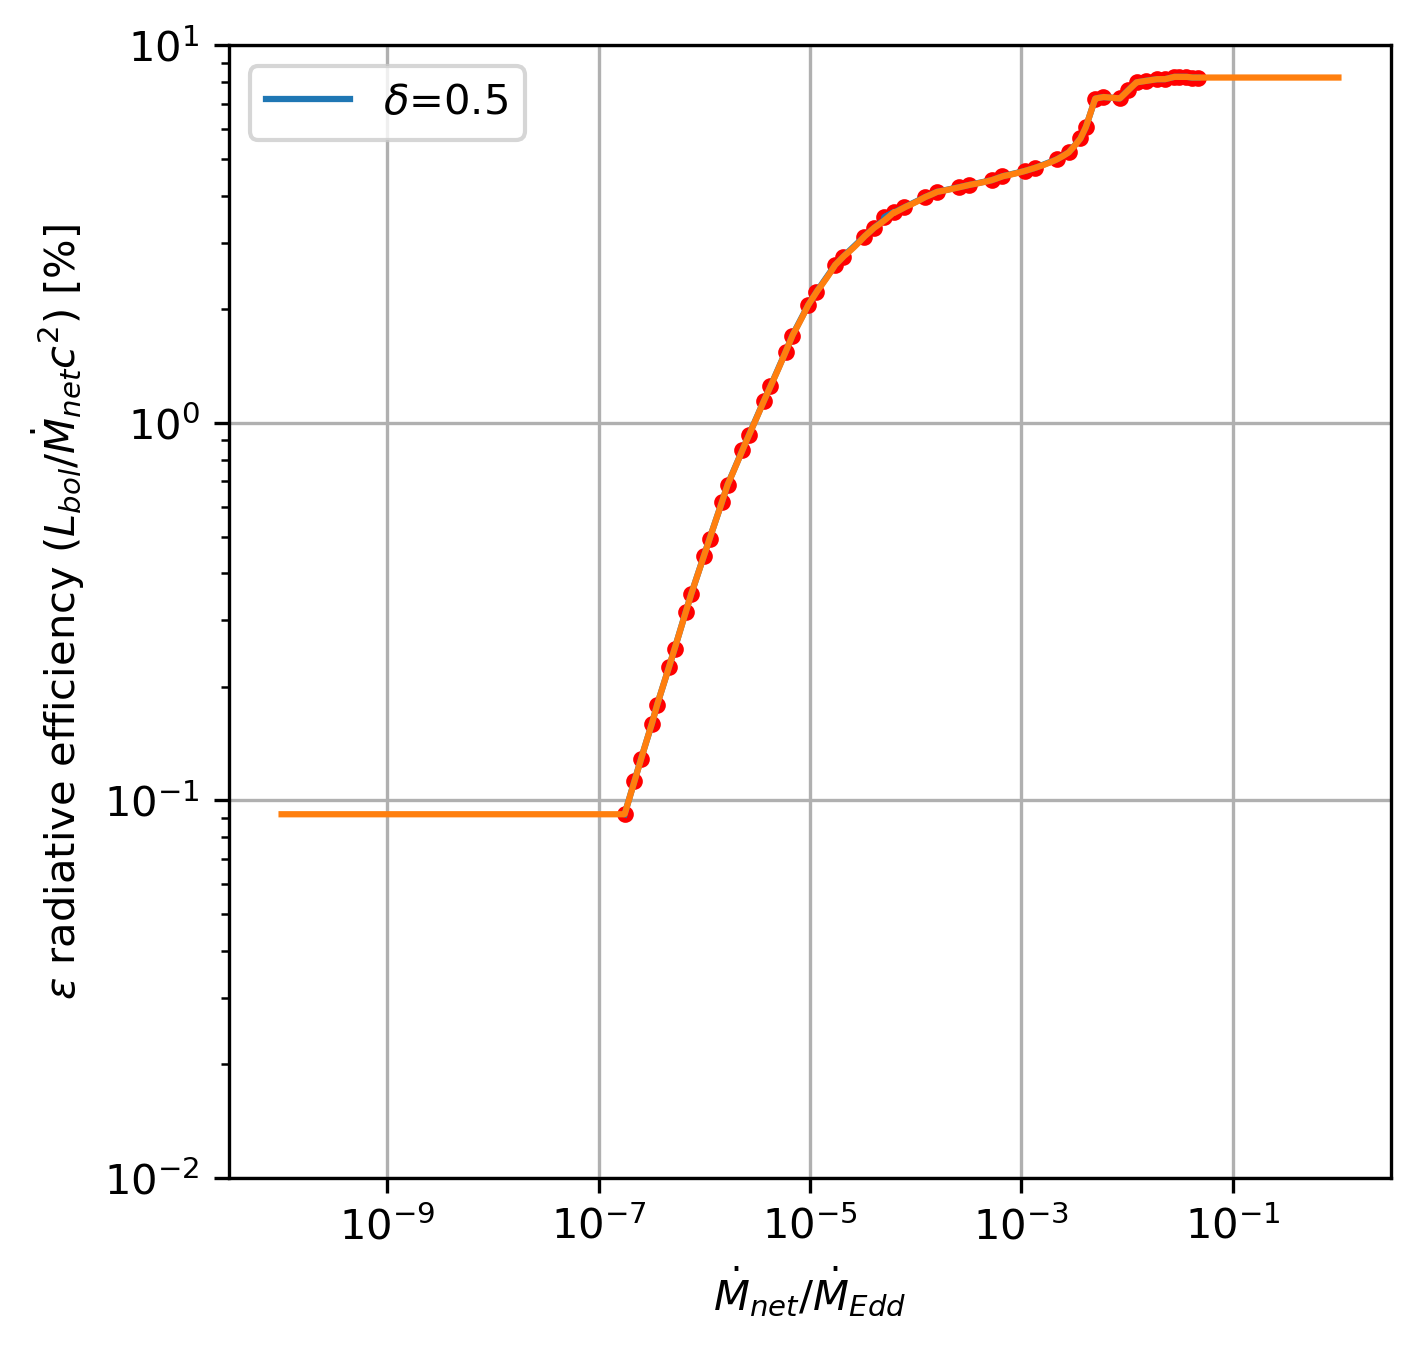

In [269]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
# axes.set_xlim([10**-6, 10**-1])
axes.set_yscale('log')
axes.set_ylim([0.01, 10])
axes.set_xlabel(r'$\dot{M}_{net}/\dot{M}_{Edd}$')
axes.set_ylabel(r'$\epsilon$ radiative efficiency $(L_{bol}/\dot{M}_{net}c^{2})$ [%]')

accretion_rate_digitizer, radiative_efficiency_digitizer = np.loadtxt(f'./radiative_efficiency_map_56.csv', delimiter=', ', unpack=True)
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, 'r.')
axes.plot(accretion_rate_digitizer, radiative_efficiency_digitizer, label=r'$\delta$=0.5')
grid = np.logspace(-10, 0, 2000)
axes.plot(grid, np.interp(grid, accretion_rate_digitizer, radiative_efficiency_digitizer))

axes.grid()
axes.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1500x1500 with 0 Axes>

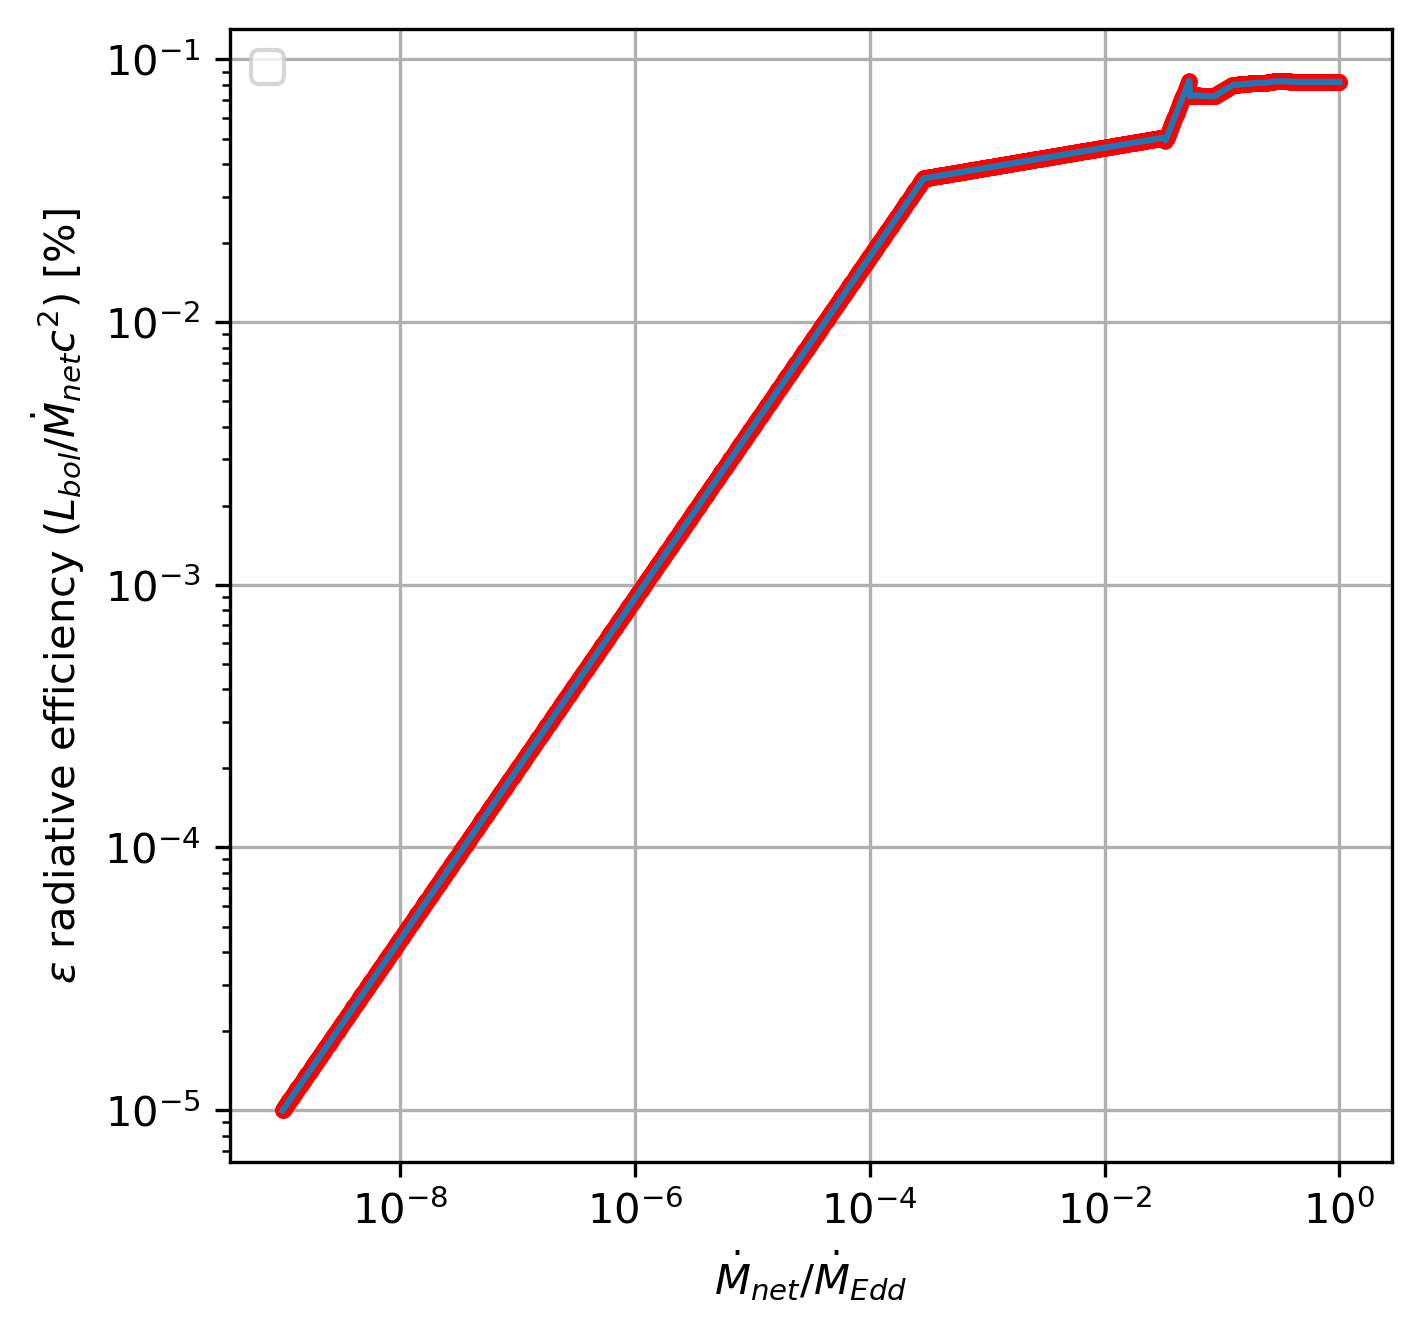

In [270]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
# axes.set_xlim([10**-7, 10**-1])
axes.set_yscale('log')
# axes.set_ylim([0.01, 10])
axes.set_xlabel(r'$\dot{M}_{net}/\dot{M}_{Edd}$')
axes.set_ylabel(r'$\epsilon$ radiative efficiency $(L_{bol}/\dot{M}_{net}c^{2})$ [%]')

# try to plot piecewise radiative efficiency power law for delta = 0.5
accretion_rate_grid = np.logspace(-9, 0, 2000)
def radiative_efficiency_grid(m_dot):
    alpha = 0.1
    m = m_dot*0.1*0.1/alpha
    cond = [
        m <= 2.9E-5,
        ((2.9E-5 < m) & (m < 3.3E-3)),
        ((3.3E-3 < m) & (m < 5.3E-3)),
        m > 5.3E-3,
    ]
    func = [
        lambda m: 1.58*np.sqrt(alpha/0.1)*np.power(m*100, 0.65),
        lambda m: 0.055*np.sqrt(alpha/0.1)*np.power(m*100, 0.076),
        lambda m: 0.17*np.sqrt(alpha/0.1)*np.power(m*100, 1.12),
        lambda m: 0.01*np.interp(m, accretion_rate_digitizer, radiative_efficiency_digitizer)
    ]
    return np.piecewise(m, cond, func)
axes.plot(accretion_rate_grid, radiative_efficiency_grid(accretion_rate_grid), 'r.')
axes.plot(accretion_rate_grid, radiative_efficiency_grid(accretion_rate_grid))
# axes.plot(accretion_rate_grid, 0.01*np.interp(accretion_rate_grid*0.1, accretion_rate_digitizer, radiative_efficiency_digitizer))

axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

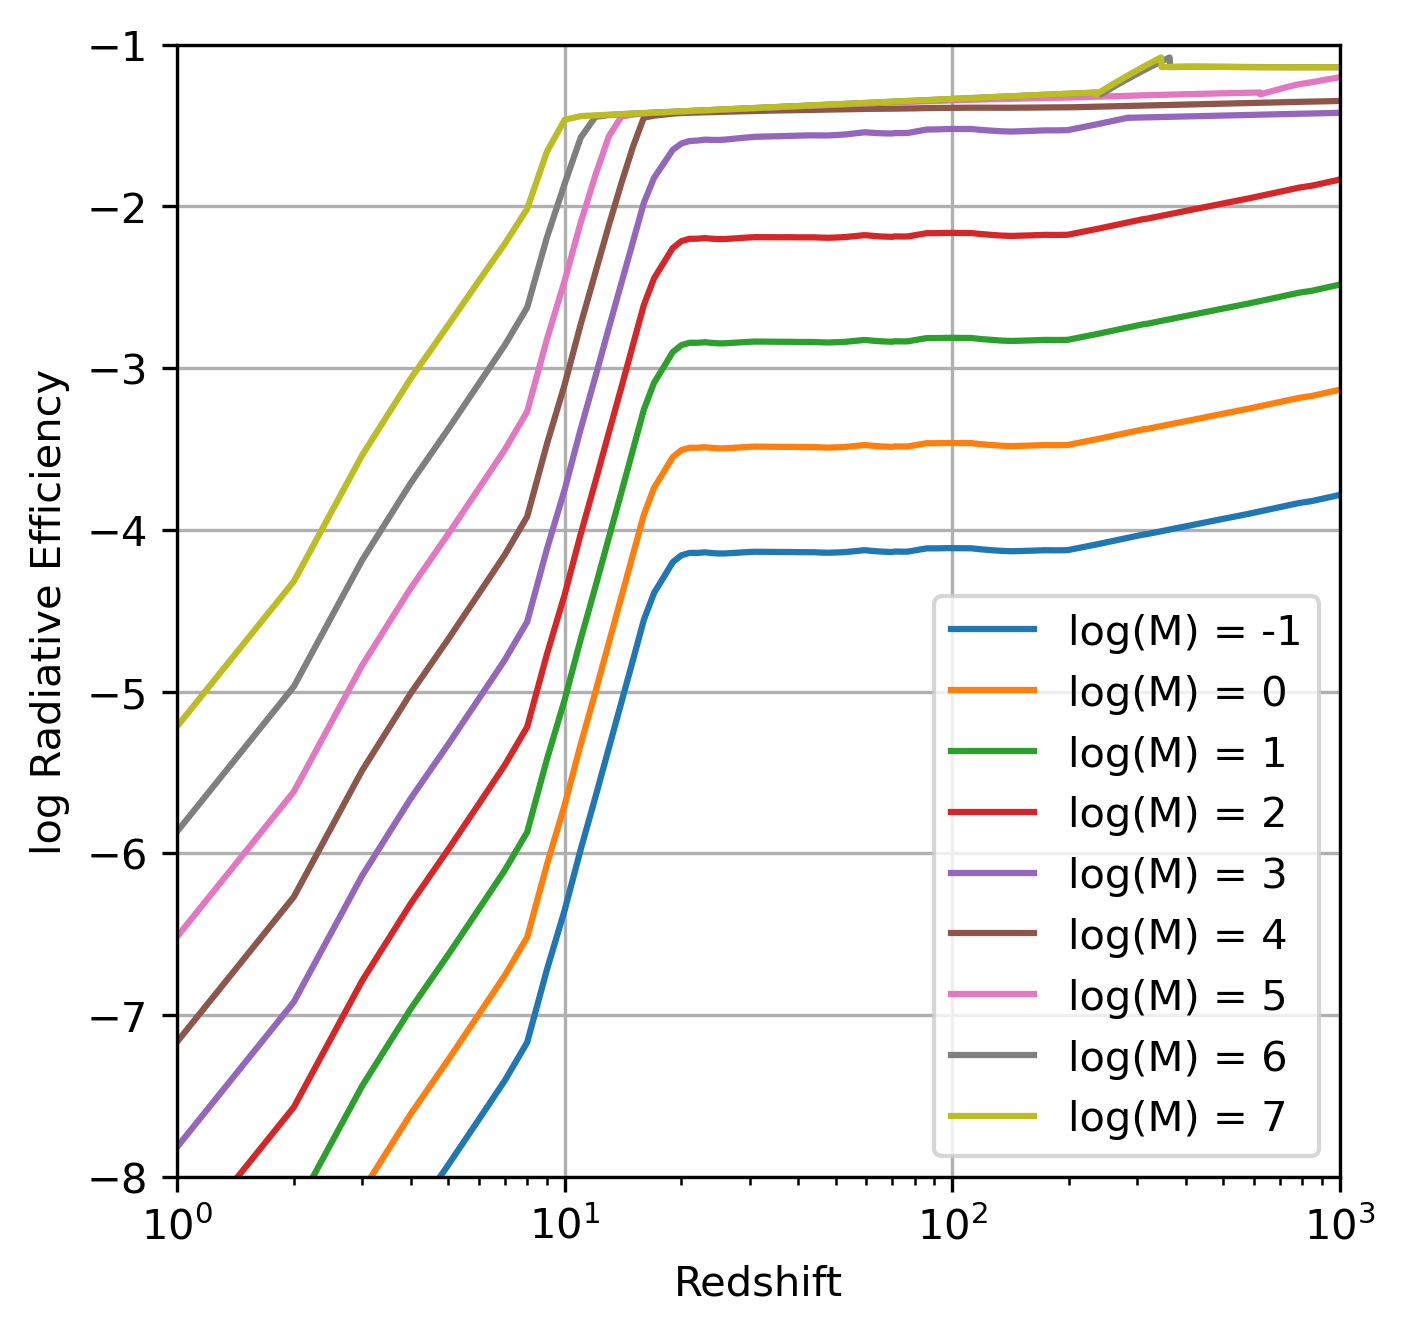

In [271]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([-8, -1])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Radiative Efficiency')

# for Schwarzschild radius in m (M in solar mass)
def schwarzschild_radius(M):
    return 2*6.6743E-11*M*2E30/3E8/3E8
# for radial dependency
def radial_correction(M):
    return np.power(schwarzschild_radius(M)*100/Bondi_radius(M), 0.4)

# define function for radiative efficiency
def radiative_efficiency(M):
    return 0.01*np.interp(accretion_rate(M)*10, accretion_rate_digitizer*10, 0.01*radiative_efficiency_digitizer)

for i in range(-1, 8):
    axes.plot(redshift, np.log10(radiative_efficiency_grid(0.1*accretion_rate(10**i))), label=f'log(M) = {i}')
axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

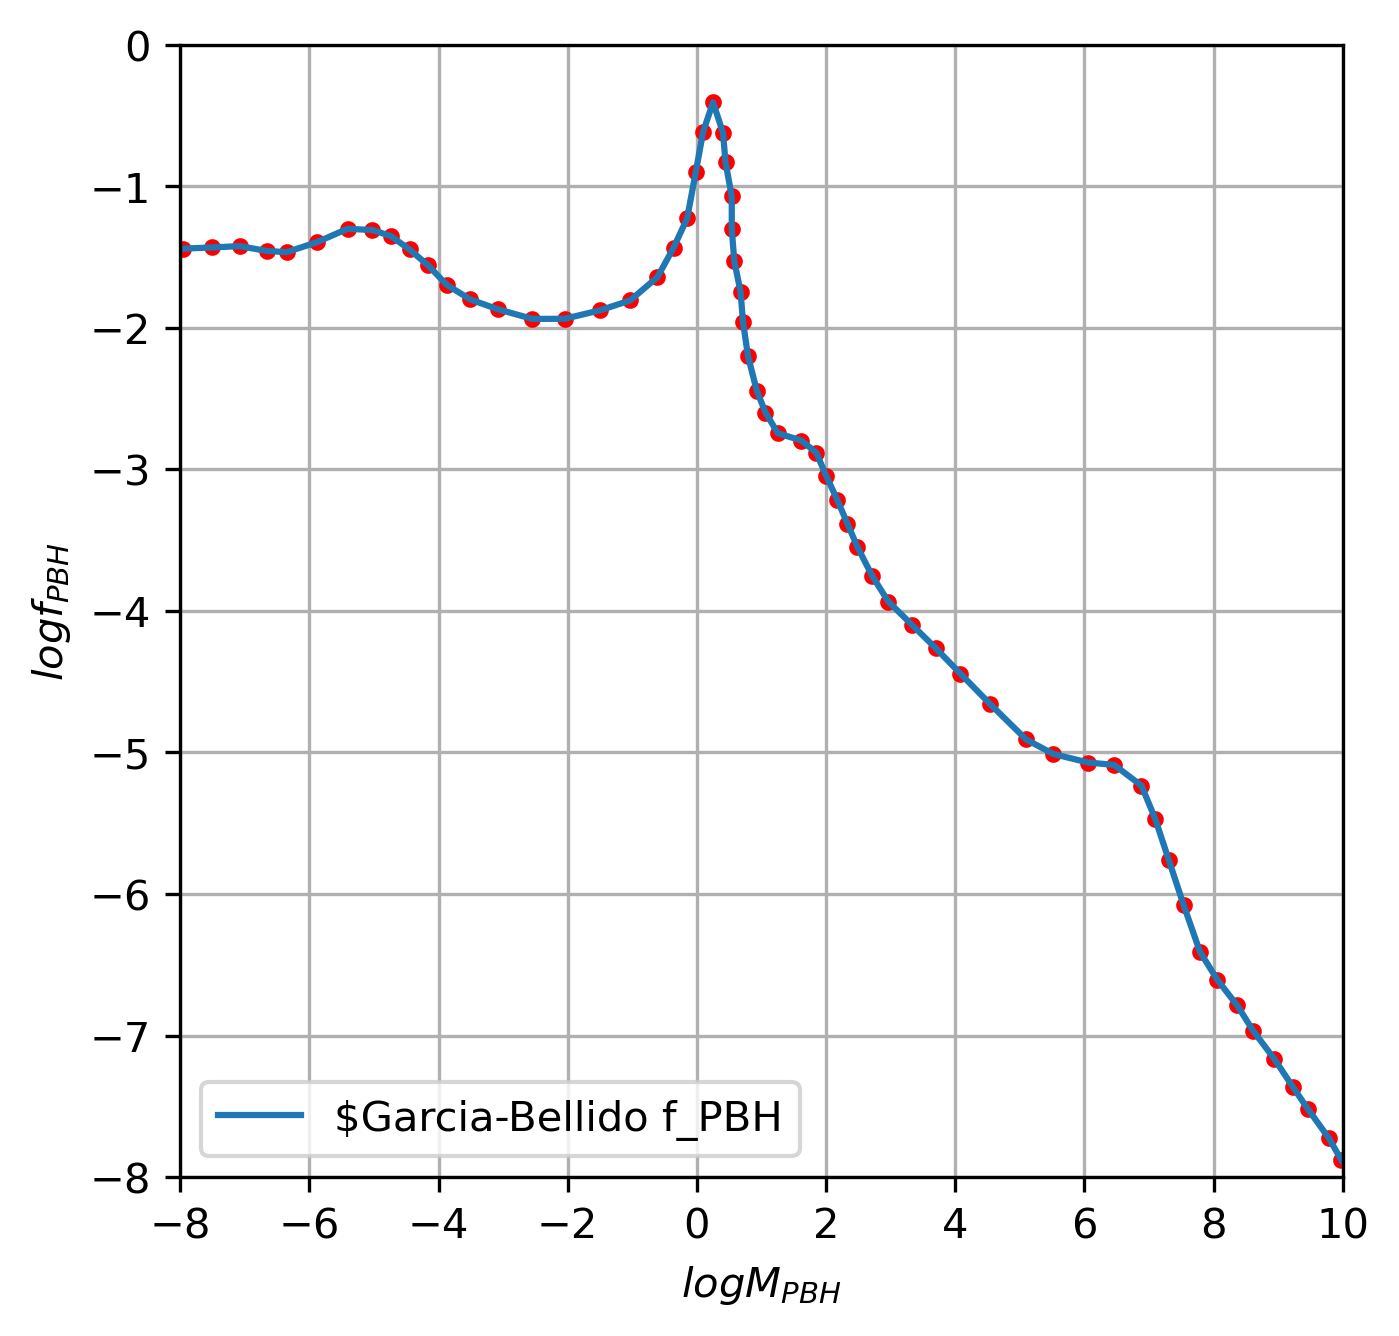

In [272]:
fig = plt.figure()
fig, axes = plt.subplots()
# axes.set_xscale('log')
axes.set_xlim([-8, 10])
# axes.set_yscale('log')
axes.set_ylim([-8, 0])
axes.set_xlabel(r'$log M_{PBH}$')
axes.set_ylabel(r'$log f_{PBH}$')

log_mass_digitizer, distribution_digitizer = np.loadtxt(f'./PBH_mass_spectrum.csv', delimiter=', ', unpack=True)
axes.plot(log_mass_digitizer, distribution_digitizer, 'r.')
axes.plot(log_mass_digitizer, distribution_digitizer, label=r'$Garcia-Bellido f_PBH')

# define density of each M
def density(M):
    return 10**np.interp(M, log_mass_digitizer, distribution_digitizer)/10**i

axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

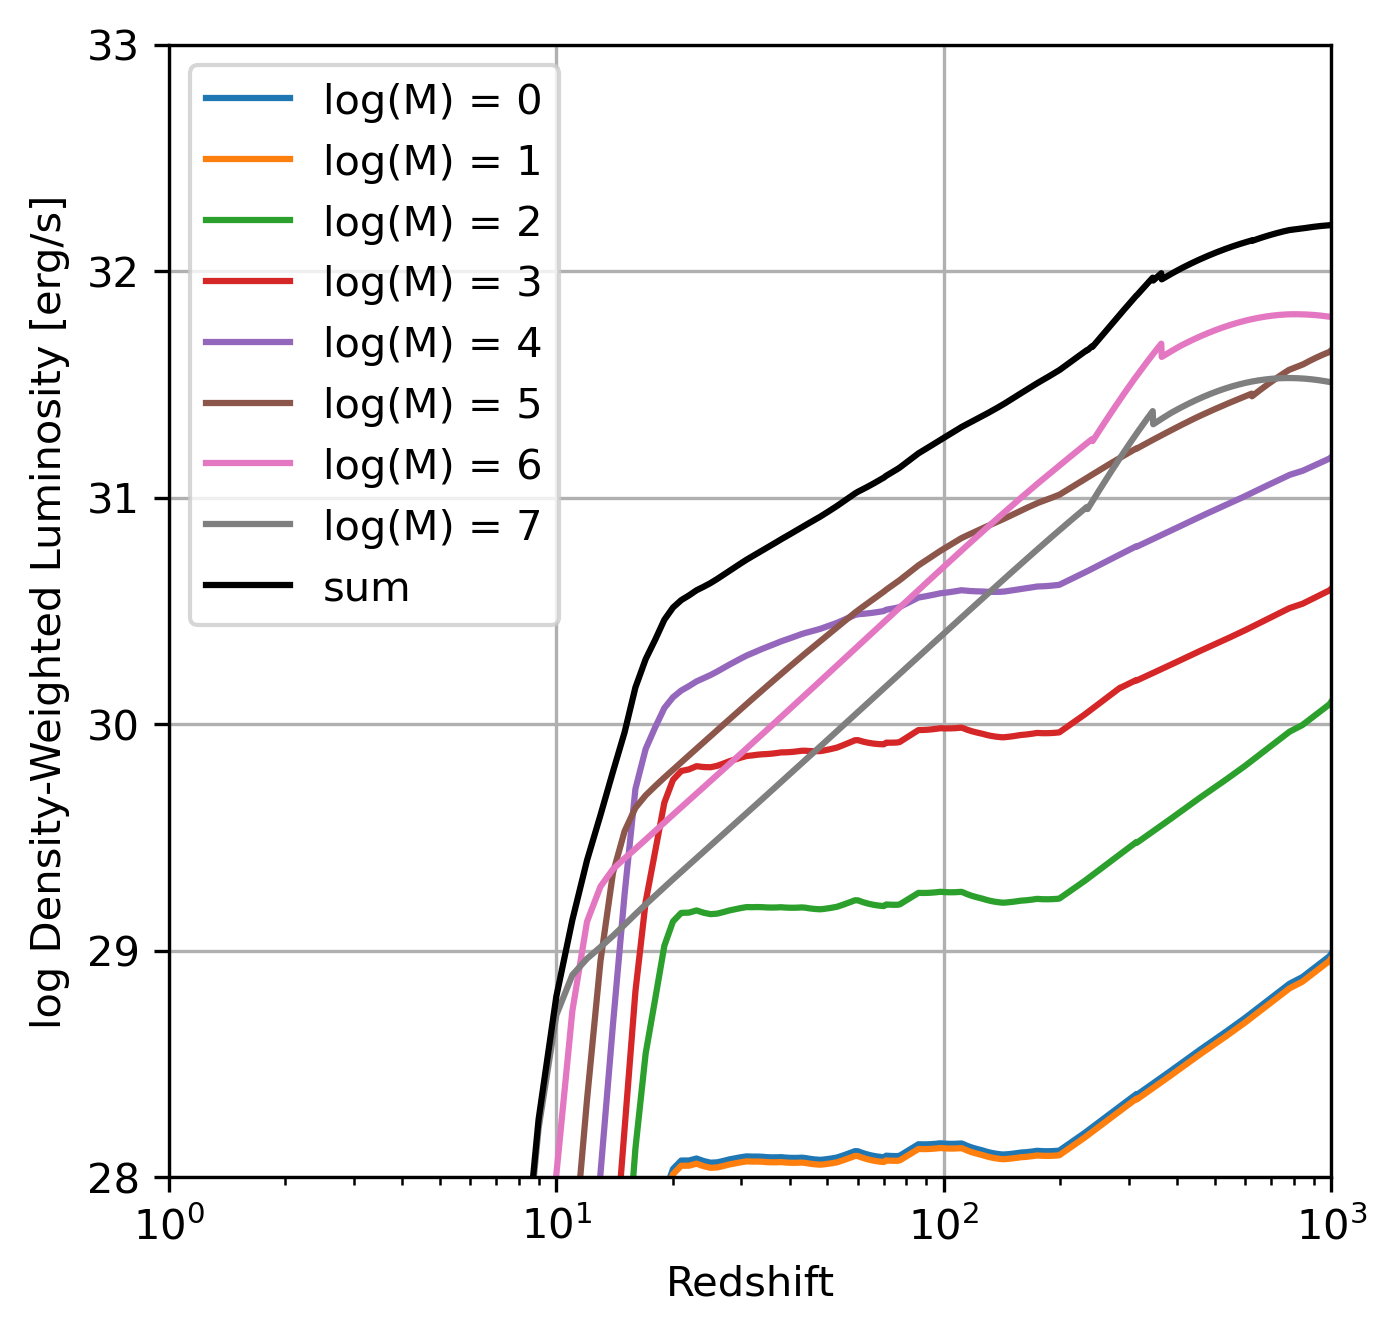

In [273]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([28, 33])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Density-Weighted Luminosity [erg/s]')

# eddington luminosity in erg/s
def Eddington_luminosity(M):
    return 1.26E38*M
def luminosity(log_M):
    return density(log_M)*Eddington_luminosity(10**log_M)*accretion_rate(10**log_M)*radiative_efficiency_grid(0.1*accretion_rate(10**log_M))

luminosity_sum = np.array([0]*redshift.size)
for i in range(0, 8):
    luminosity_sum = luminosity_sum + luminosity(i)
    axes.plot(redshift, np.log10(luminosity(i)), label=f'log(M) = {i}')
axes.plot(redshift, np.log10(luminosity_sum), 'black', label=f'sum')

axes.grid()
axes.legend()

[ 3359.91821624  5299.33628513  6502.05310883  7329.1190808
  7940.59753737  8415.89953551  8798.93762436  9116.11483732
  9384.35747611  9615.07416262  9816.26894817  9993.74411858
 10151.82185654 10293.7965883  10422.22916962 10539.14432971
 10646.16683746 10744.61766024 10835.58330061 10919.96672525
 10998.5253953  11071.90008894 11140.63703962 11205.20514804
 11266.00951288 11323.40217621 11377.69073649 11429.14531212
 11478.00421618 11524.4786152  11568.75637997 11611.00528922
 11651.37571066 11690.00285731 11727.00869649 11762.50357282
 11796.58759462 11829.3518234  11860.87929862 11891.24592407
 11920.52123742 11948.76908066 11976.04818627 12002.41269124
 12027.91258934 12052.59413006 12076.50017166 12099.67049433
 12122.1420787  12143.94935422 12165.12442103 12185.69724876
 12205.69585499 12225.14646568 12244.07365992 12262.50050046
 12280.448652   12297.93848824 12314.98918914 12331.61882942
 12347.84445908 12363.68217691 12379.14719767 12394.25391353
 12409.01595037 12423.446

<Figure size 1500x1500 with 0 Axes>

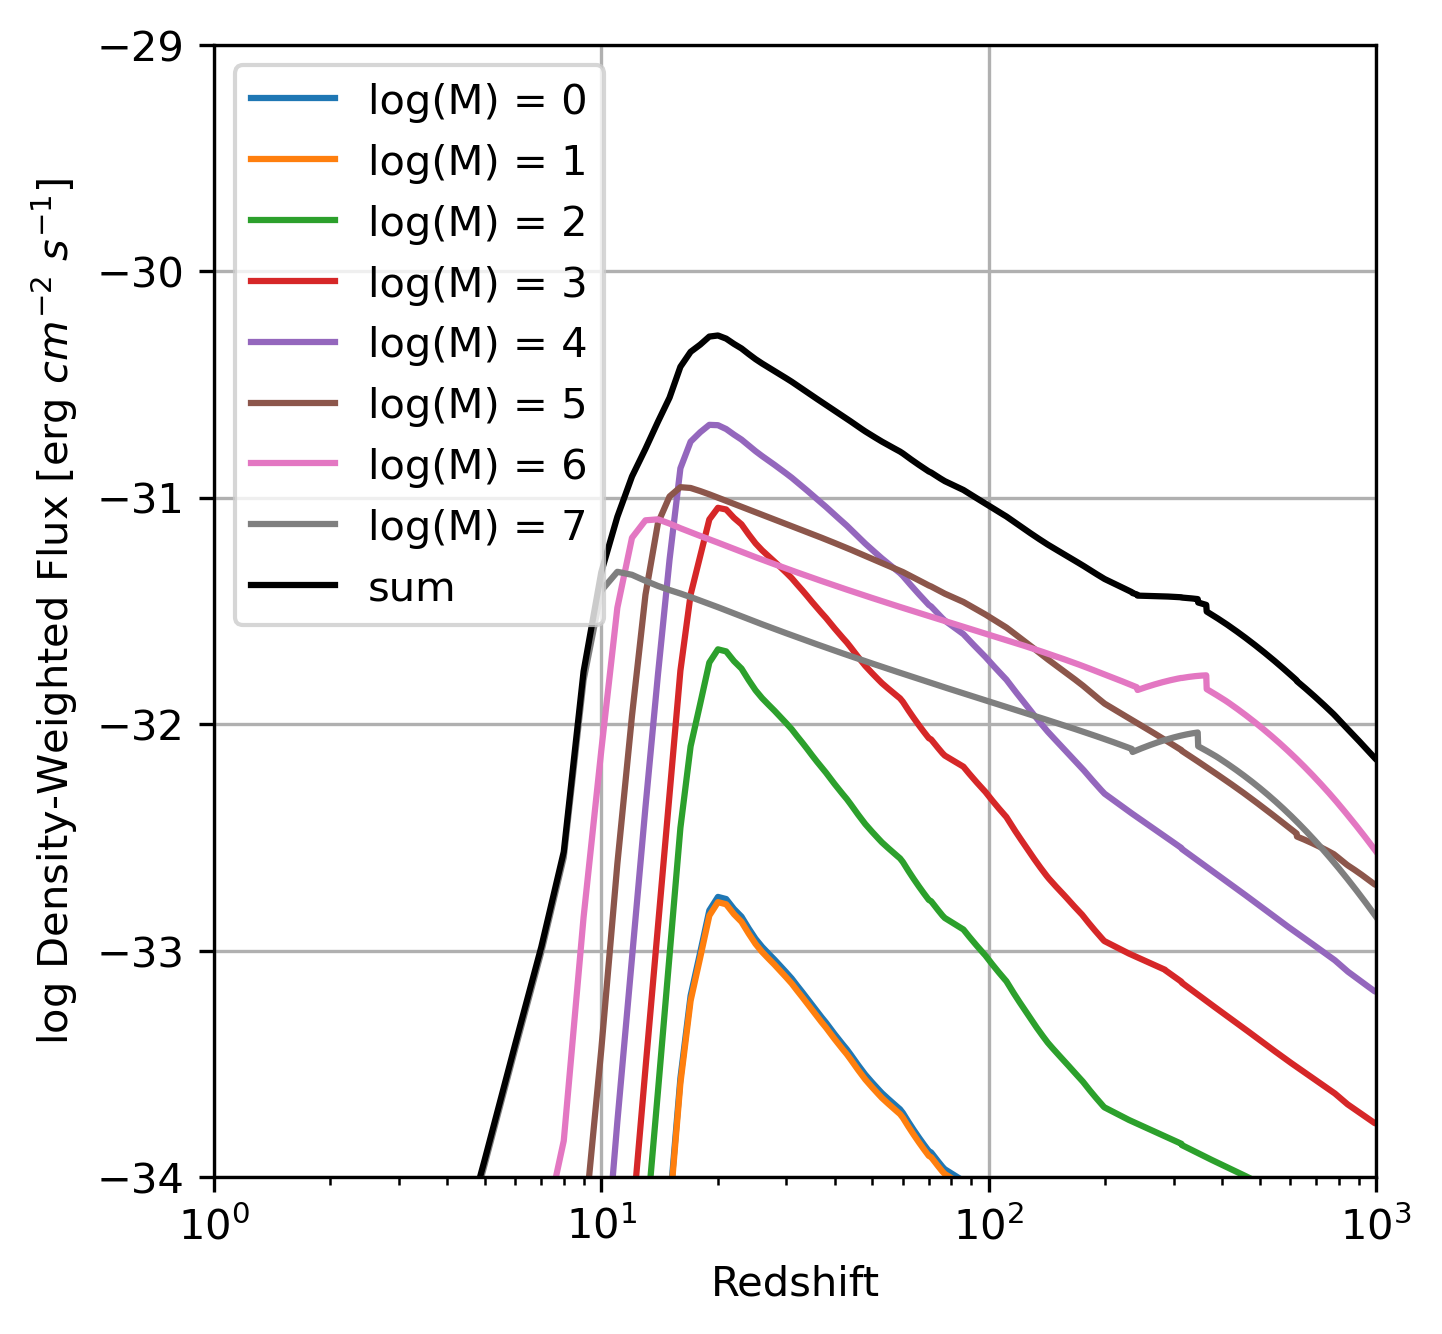

In [284]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([-34, -29])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Density-Weighted Flux [erg $cm^{-2}$ $s^{-1}$]')


def H(z):
    return np.sqrt(0.3*(1+z)**3+0.7)
# in Mpc
def comoving_distance(z):
    res = []
    for i in range(len(z)):
        z_local = np.array([0, *z[:i+1]])
        res.append(np.trapz(1/H(z_local), z_local))
    return np.array(res)*(3E8/70/1000)

print(comoving_distance(redshift))
luminosity_distance = (1+redshift)*comoving_distance(redshift)*(3.08567758E16*1E6*100)
def flux(i):
    return luminosity(i)/(4*np.pi*luminosity_distance**2)

flux_sum = np.array([0]*redshift.size)
for i in range(0, 8):
    flux_sum = flux_sum + flux(i)
    axes.plot(redshift, np.log10(flux(i)), label=f'log(M) = {i}')
axes.plot(redshift, np.log10(flux_sum), 'black', label=f'sum')  

axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

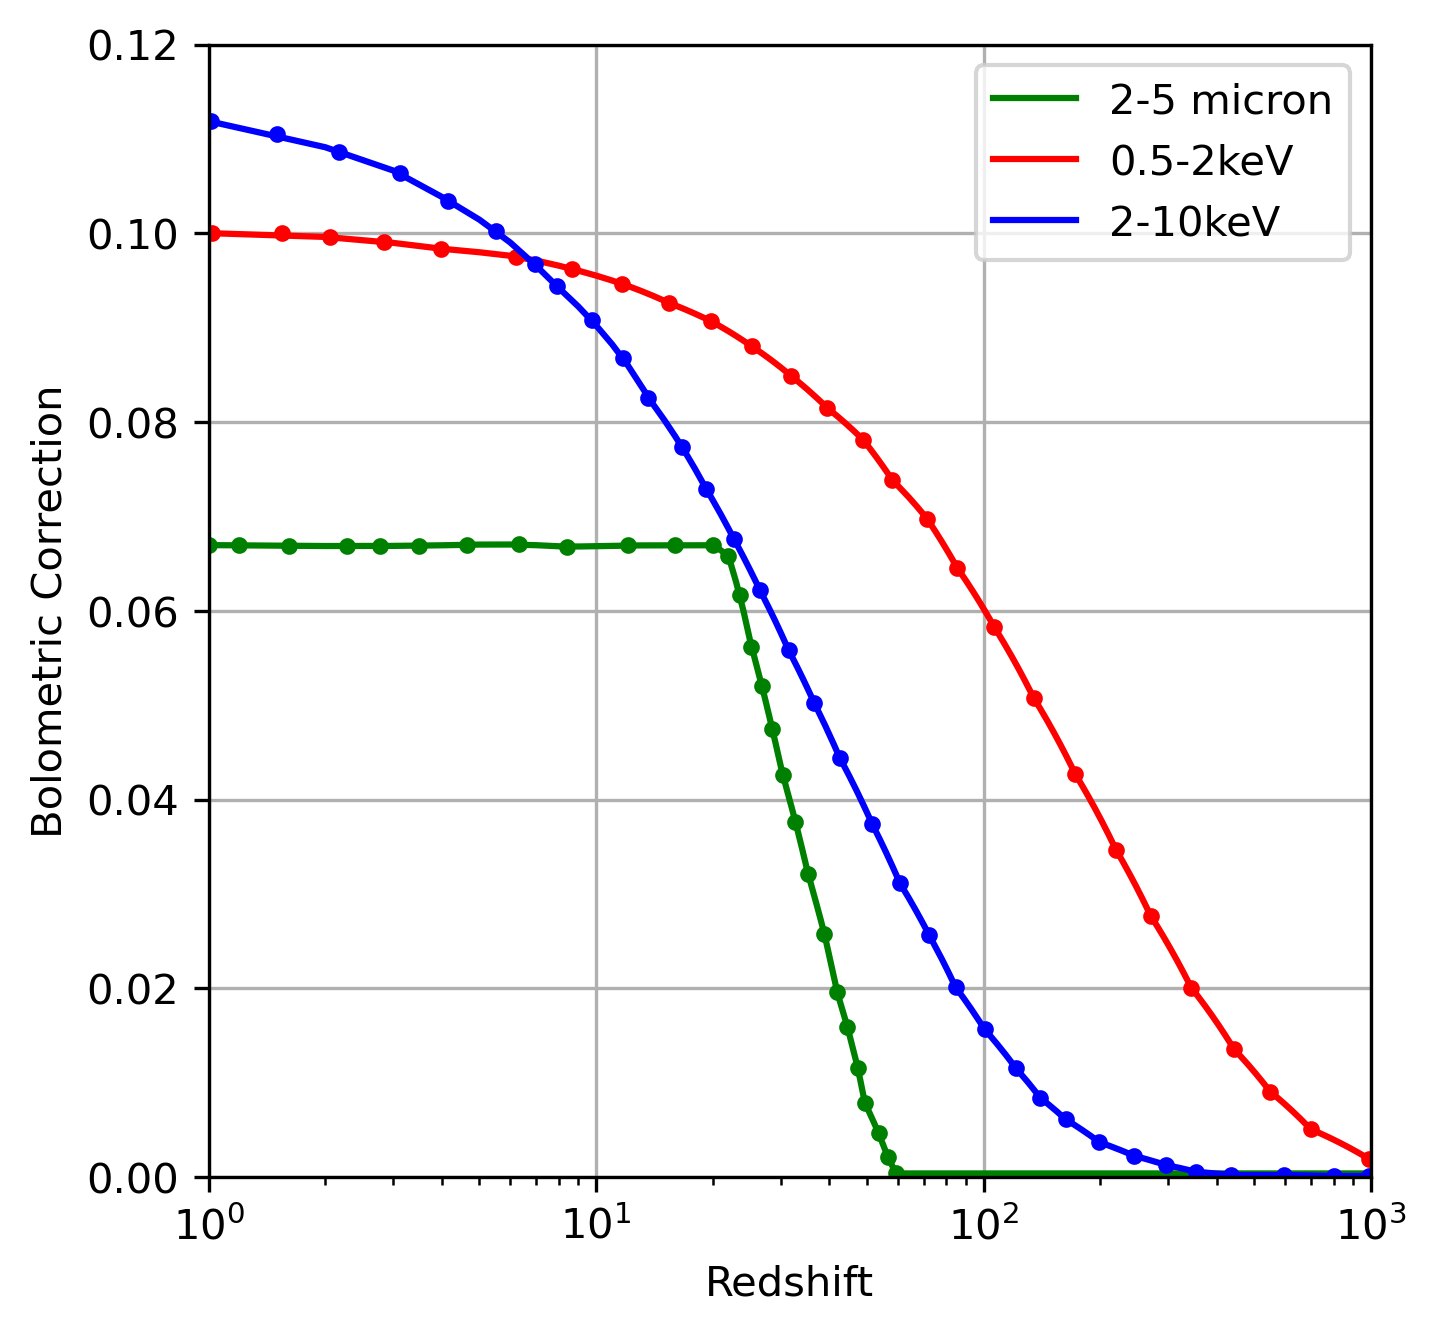

In [275]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([0, 0.12])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'Bolometric Correction')

redshift_digitizer0, bolometric_correction_digit_green = np.loadtxt(f'./bolometric_correction_micron.csv', delimiter=', ', unpack=True)
bolometric_correction_micron = np.interp(redshift, redshift_digitizer0, bolometric_correction_digit_green)
redshift_digitizer1, bolometric_correction_digit_red = np.loadtxt(f'./bolometric_correction_2keV.csv', delimiter=', ', unpack=True)
bolometric_correction_2keV = np.interp(redshift, redshift_digitizer1, bolometric_correction_digit_red)
redshift_digitizer2, bolometric_correction_digit_blue = np.loadtxt(f'./bolometric_correction_10keV.csv', delimiter=', ', unpack=True)
bolometric_correction_10keV = np.interp(redshift, redshift_digitizer2, bolometric_correction_digit_blue)

axes.plot(redshift_digitizer0, bolometric_correction_digit_green, 'g.')
axes.plot(redshift, bolometric_correction_micron, 'g', label=f'2-5 micron')
axes.plot(redshift_digitizer1, bolometric_correction_digit_red, 'r.')
axes.plot(redshift, bolometric_correction_2keV, 'r', label=f'0.5-2keV')
axes.plot(redshift_digitizer2, bolometric_correction_digit_blue, 'b.')
axes.plot(redshift, bolometric_correction_10keV, 'b', label=f'2-10keV')

axes.grid()
axes.legend()

ValueError: operands could not be broadcast together with shapes (1001,) (1000,) 

<Figure size 1500x1500 with 0 Axes>

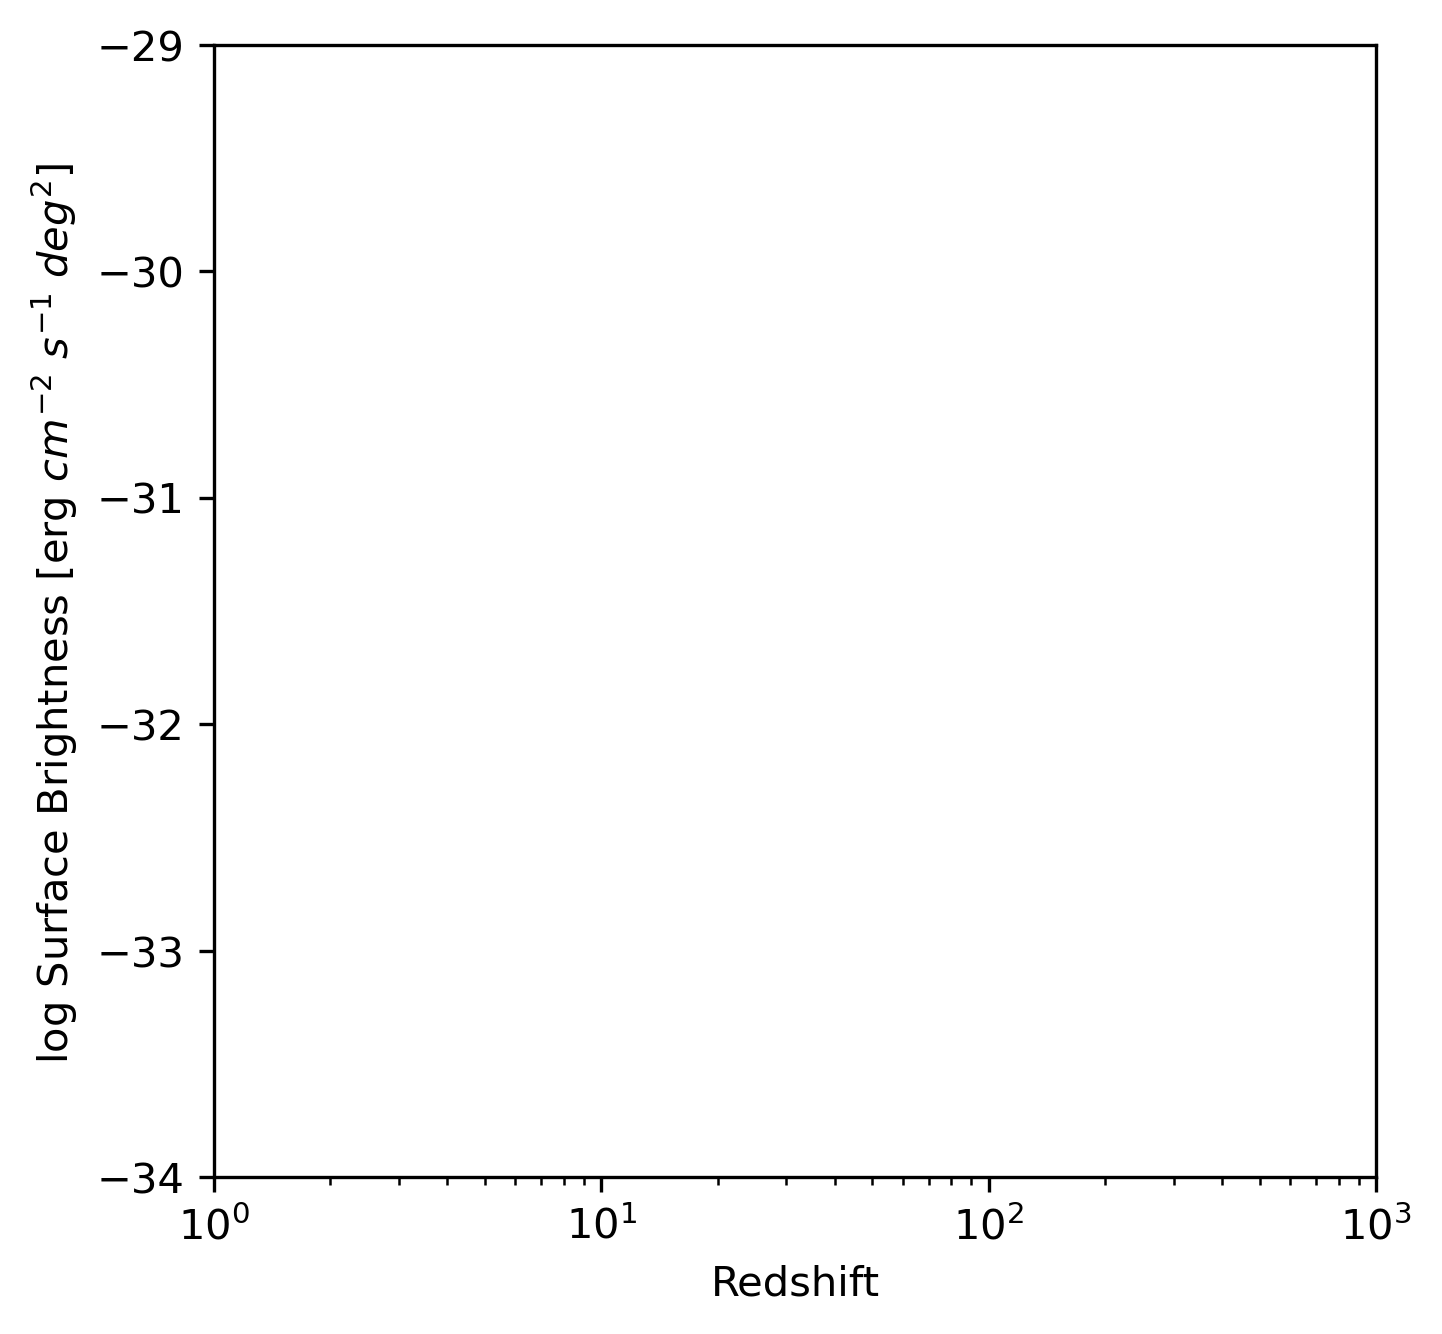

In [286]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
axes.set_ylim([-34, -29])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Surface Brightness [erg $cm^{-2}$ $s^{-1}$ $deg^{2}$] ')


def proper_distance(z):
    res = []
    for i in range(len(z)):
        z_local = np.array([0, *z[:i+1]])
        res.append(np.trapz(1/H(z_local), z_local))
    return np.array(res)*(3E8/70/1000)/(1+z)
# in Mpc^3
def volume(z):
    r = comoving_distance(z)/(1+z)
    return (4/3*np.pi*r**3)

print(proper_distance(redshift))
print()
number_density = (volume(redshift_in)-volume(redshift))*3.32E19*(1+redshift)**3

def surface_brightness(correction):
    return correction*flux_sum/(4*np.pi)*number_density

axes.plot(redshift, np.log10(surface_brightness(bolometric_correction_micron)), 'g', label=f'2-5micron')  
axes.plot(redshift, np.log10(surface_brightness(bolometric_correction_2keV)), 'r', label=f'0.5-2keV')  
axes.plot(redshift, np.log10(surface_brightness(bolometric_correction_10keV)), 'b', label=f'2-10keV')  


axes.grid()
axes.legend()

<Figure size 1500x1500 with 0 Axes>

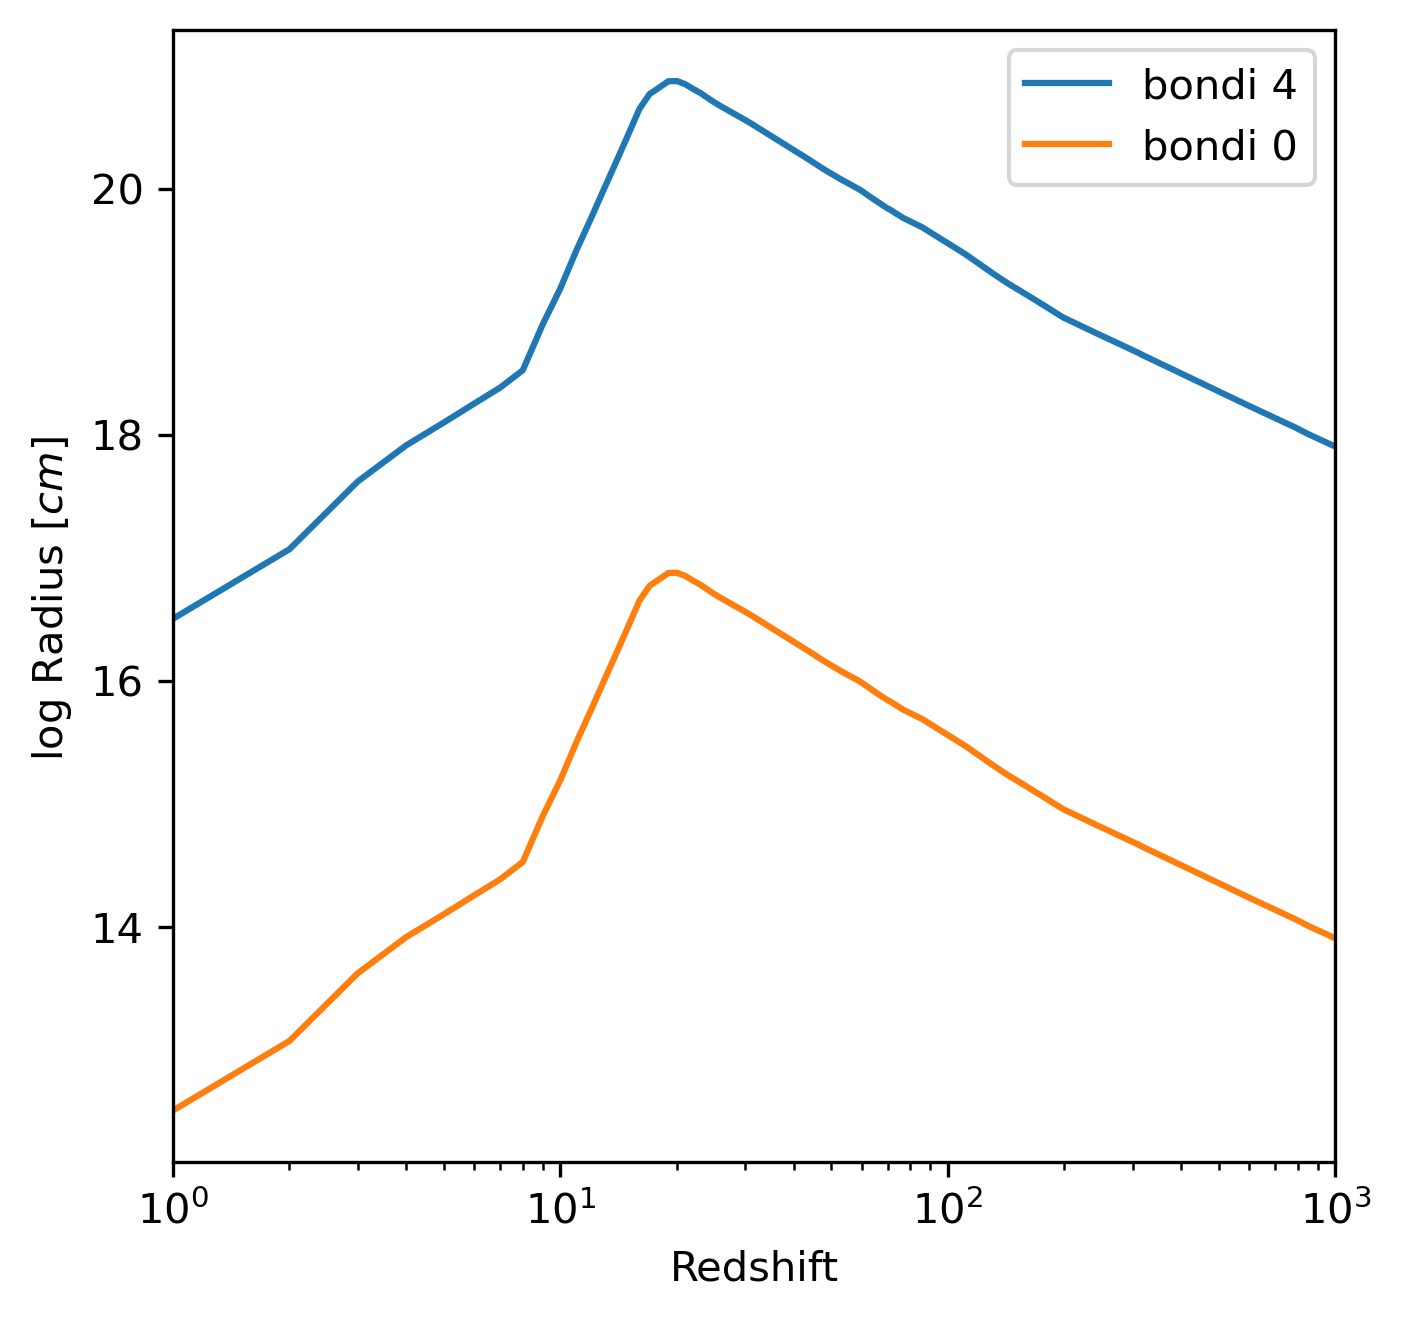

In [ ]:
fig = plt.figure()
fig, axes = plt.subplots()
axes.set_xscale('log')
axes.set_xlim([1, 1000])
# axes.set_yscale('log')
# axes.set_ylim([-9, 0])
axes.set_xlabel(r'Redshift')
axes.set_ylabel(r'log Radius $[cm]$ ')

axes.plot(redshift, np.log10(Bondi_radius(10**4)), label='bondi 4')
axes.plot(redshift, np.log10(Bondi_radius(1)), label='bondi 0')

axes.legend()